In [2]:
from osgeo import gdal
import matplotlib.pyplot as plt
import rasterio
# import numpy as np
# import geopandas as gpd
# import seaborn as sns
%matplotlib inline

In [24]:
dem_path = "MARS-Dataset/training_site/DEM/Low-res_DEM/Firsoff_HiRISE_5_low_res.tif-adj.tif"
hillshade_path = "MARS-Dataset/training_site/DEM/Low-res_DEM/Hillshade.tif"
dem_raster = rasterio.open(hillshade_path)

In [25]:
dem_raster.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["Geographic Coordinate System",DATUM["D_MARS",SPHEROID["MARS",3396190,0]],PRIMEM["Reference Meridian",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Equirectangular"],PARAMETER["standard_parallel_1",0],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [26]:
dem_raster.dtypes

('uint8',)

In [27]:
dem_raster.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
dem_raster.transform

Affine(18.0, 0.0, -534141.0,
       0.0, -18.0, 135873.0)

In [29]:
dem_raster.name

'MARS-Dataset/training_site/DEM/Low-res_DEM/Hillshade.tif'

In [30]:
dem_raster.mode

'r'

In [31]:
dem_raster.count

1

In [32]:
print(dem_raster.width)
print(dem_raster.height)

358
632


In [33]:
dem_raster.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["Geographic Coordinate System",DATUM["D_MARS",SPHEROID["MARS",3396190,0]],PRIMEM["Reference Meridian",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Equirectangular"],PARAMETER["standard_parallel_1",0],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [34]:
dem_raster.indexes

(1,)

In [35]:
band1 = dem_raster.read(1)
band1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [36]:
band1[dem_raster.height//2, dem_raster.width//2]

239

In [37]:
dem_raster.xy(dem_raster.height//2, dem_raster.width//2)

(-530910.0, 130176.0)

<function matplotlib.pyplot.show(close=None, block=None)>

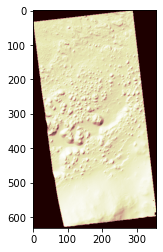

In [38]:
plt.imshow(dem_raster.read(1), cmap='pink')
plt.show

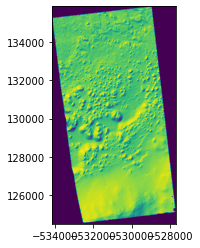

<AxesSubplot:>

In [39]:
from rasterio.plot import show
show(dem_raster.read(), transform=dem_raster.transform)

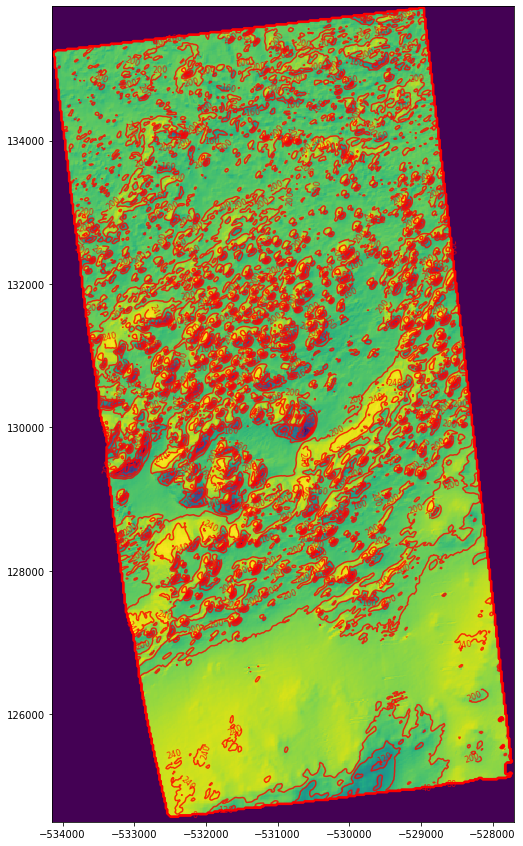

In [59]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
show((dem_raster, 1), cmap='viridis', interpolation='none', ax=ax)
show((dem_raster, 1), contour=True, ax=ax)
plt.savefig("countour.jpg", bbox_inches='tight')